# OpenClassrooms - parcours Data Analyst Business Intelligence - P8

# Milestone 1 - Analyse des données

Dans cette partie nous allons analyser le jeu de données que nous avons à notre disposition. Notre objectif est de comprendre les relations entre les variables, et surtout, celles qui influent sur le prix des transactions immobilières. Grâce à ce travail, nous pourrons ne conserver que les variables qui seront utiles à l'apprentissage de notre algorithme.

## 1.Type des données

La première étape à réaliser est d'importer les données dans le notebook et d'opérer des transformations sur les variables si celles-ci s'imposent (exemple : nettoyage ou changement de type des variables, etc.).

In [1]:
#On importe les librairies que nous utiliserons pour traiter les données et les visualiser
import pandas as pd, numpy as np
# N'oubliez pas d'avoir installé les librairies pandas, numpy et matplotlib via la commande pip
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import warnings
warnings.filterwarnings("ignore")


In [2]:
#On importe les données dans un dataframe
df_histoImmo_paris = pd.read_excel("historique_immo_paris_2017_2021_vdef2.xlsx")
df_portef_actif = pd.read_excel("portefeuille_actifs+(3).xlsx")

Attention, si l'opération ci-dessus ne marche pas, il se peut que le package "openpyxl" ne soit pas présent sur votre ordinateur. Si c'est le cas vous pouvez l'installer en éxécutant la commande : pip install openpyxl ou conda install openpyxl.

In [3]:
#On vérifie que le type des données attribué par pandas est cohérent
df_histoImmo_paris.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26196 entries, 0 to 26195
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date_mutation     26196 non-null  datetime64[ns]
 1   valeur_fonciere   26196 non-null  float64       
 2   adresse_numero    26196 non-null  int64         
 3   adresse_nom_voie  26196 non-null  object        
 4   code_postal       26196 non-null  int64         
 5   nom_commune       26196 non-null  object        
 6   code_type_local   26196 non-null  int64         
 7   type_local        26196 non-null  object        
 8   surface_reelle    26196 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 1.8+ MB


In [4]:
df_histoImmo_paris.head()

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle
0,2017-01-03,5.505597e+05,8,RUE DES COUTURES SAINT GERVAIS,75003,Paris 3e Arrondissement,2,Appartement,50
1,2017-01-12,1.576492e+06,32,AV MARCEAU,75008,Paris 8e Arrondissement,2,Appartement,163
2,2017-01-10,6.577574e+05,52,RUE DU FAUBOURG SAINT HONORE,75008,Paris 8e Arrondissement,2,Appartement,66
3,2017-01-10,2.500868e+05,64,RUE DU VERTBOIS,75003,Paris 3e Arrondissement,2,Appartement,22
4,2017-01-13,1.762667e+05,25,RUE DES LAVANDIERES STE OPPORT,75001,Paris 1er Arrondissement,2,Appartement,15


In [5]:
pd.options.display.float_format = '{:.2f}'.format
print(df_histoImmo_paris[['valeur_fonciere']])

       valeur_fonciere
0            550559.68
1           1576492.46
2            657757.36
3            250086.82
4            176266.71
...                ...
26191        471223.93
26192       1982330.46
26193        312435.91
26194        156223.38
26195        369429.37

[26196 rows x 1 columns]


In [6]:
df_histoImmo_paris.head()

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle
0,2017-01-03,550559.68,8,RUE DES COUTURES SAINT GERVAIS,75003,Paris 3e Arrondissement,2,Appartement,50
1,2017-01-12,1576492.46,32,AV MARCEAU,75008,Paris 8e Arrondissement,2,Appartement,163
2,2017-01-10,657757.36,52,RUE DU FAUBOURG SAINT HONORE,75008,Paris 8e Arrondissement,2,Appartement,66
3,2017-01-10,250086.82,64,RUE DU VERTBOIS,75003,Paris 3e Arrondissement,2,Appartement,22
4,2017-01-13,176266.71,25,RUE DES LAVANDIERES STE OPPORT,75001,Paris 1er Arrondissement,2,Appartement,15


In [7]:
df_portef_actif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   adresse_numero             275 non-null    int64  
 1   adresse_nom_voie           275 non-null    object 
 2   code_postal                275 non-null    int64  
 3   code_commune               275 non-null    int64  
 4   nom_commune                275 non-null    object 
 5   surface_carrez             275 non-null    float64
 6   code_type_local            275 non-null    int64  
 7   type_local                 275 non-null    object 
 8   surface_reelle_bati        275 non-null    int64  
 9   nombre_pieces_principales  275 non-null    int64  
 10  longitude                  275 non-null    float64
 11  latitude                   275 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 25.9+ KB


In [8]:
df_histoImmo_paris.isna().sum()

date_mutation       0
valeur_fonciere     0
adresse_numero      0
adresse_nom_voie    0
code_postal         0
nom_commune         0
code_type_local     0
type_local          0
surface_reelle      0
dtype: int64

In [9]:
df_histoImmo_paris.duplicated().sum()

16

In [10]:
#df_histoImmo_paris.drop_duplicates()
#df_histoImmo_paris.drop_duplicates(inplace=True)


In [11]:
df_portef_actif.duplicated().sum()

2

### 2. Regardons les différents types de biens immobiliers que nous avons dans nos données :

In [12]:
print(f"la liste des différents types de biens immobiliers que nous avons dans les données est :{df_portef_actif['type_local'].unique()}")


la liste des différents types de biens immobiliers que nous avons dans les données est :['Appartement' 'Local industriel. commercial ou assimilé']


On observe qu'il y a ? types de biens, et que leurs codes types sont ?. 

In [13]:
code_types = df_portef_actif['code_type_local'].unique().tolist()
print(f"On observe qu'il y a {len(code_types)} types de biens, et que leurs codes types sont {code_types}.")


On observe qu'il y a 2 types de biens, et que leurs codes types sont [2, 4].


### 3. Nombre de transactions

In [14]:
df_histoImmo_paris.shape

(26196, 9)

In [15]:
#On verifie le nombre de transactions que nous avons dans notre dataframe
nombre_biens = df_histoImmo_paris.shape[0]
print(f"le nombre de transactions dans les données est :{nombre_biens}")
nombre_appt= df_histoImmo_paris[df_histoImmo_paris['type_local'] == 'Appartement']
print(f"le nombre de transactions pour les appartements dans les données est: {len(nombre_appt)}")
nombre_trans_local_com= df_histoImmo_paris[df_histoImmo_paris['type_local'] == 'Local industriel. commercial ou assimilé']
print(f"le nombre de transactions pour les locaux commerciaux dans les données est :{len(nombre_trans_local_com)}")

le nombre de transactions dans les données est :26196
le nombre de transactions pour les appartements dans les données est: 24353
le nombre de transactions pour les locaux commerciaux dans les données est :1843


### 4. interval de l'historique des données

In [16]:
#On vérifie également la plage de l'historique disponible
premiere_date = df_histoImmo_paris['date_mutation'].min()
print(f"la première date de transaction dans les données est le : {premiere_date}")
derniere_date = df_histoImmo_paris['date_mutation'].max()
print(f"la dernière date de transaction dans les données est le : {derniere_date}")

la première date de transaction dans les données est le : 2017-01-02 00:00:00
la dernière date de transaction dans les données est le : 2021-12-31 00:00:00


## Commençons à analyser les données

Maintenant nous allons analyser les données historiques pour les 2 différents types de biens immobiliers en essayant d'identifier les relations entre les variables. Mais avant cela, il nous faudra pouvoir comparer les biens entre eux, et pour cela nous allons créer une colonne du prix au metre carré.

In [17]:
# Calcul de la colonne
df_histoImmo_paris['prix_metre_carre'] = (df_histoImmo_paris['valeur_fonciere']) / (df_histoImmo_paris['surface_reelle'])
display(df_histoImmo_paris.head())

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle,prix_metre_carre
0,2017-01-03,550559.68,8,RUE DES COUTURES SAINT GERVAIS,75003,Paris 3e Arrondissement,2,Appartement,50,11011.19
1,2017-01-12,1576492.46,32,AV MARCEAU,75008,Paris 8e Arrondissement,2,Appartement,163,9671.73
2,2017-01-10,657757.36,52,RUE DU FAUBOURG SAINT HONORE,75008,Paris 8e Arrondissement,2,Appartement,66,9966.02
3,2017-01-10,250086.82,64,RUE DU VERTBOIS,75003,Paris 3e Arrondissement,2,Appartement,22,11367.58
4,2017-01-13,176266.71,25,RUE DES LAVANDIERES STE OPPORT,75001,Paris 1er Arrondissement,2,Appartement,15,11751.11


Maintenant, analysons les appartements.

### 5. Evolution du prix au metre carré des appartements dans Paris

In [18]:
#On retire les colonnes qui sont à priori inutiles ET nous allons nous concentrer sur les appartements dans un premier temps
df_histoImmo_paris.drop(columns= ['adresse_numero','adresse_nom_voie'],axis = 1,inplace=True)

In [19]:
#Préparons un dataframe en regroupant les prix moyens de ventes des appartements par année avec la surface moyenne associée
df_histoImmo_paris['date_mutation'] = pd.to_datetime(df_histoImmo_paris['date_mutation'])
df_histoImmo_paris['annee_mutation'] = df_histoImmo_paris['date_mutation'].dt.year
#df_histoImmo_paris['annee_mutation'] = df_histoImmo_paris['annee_mutation'].astype(int)

In [20]:
df_histoImmo_2= df_histoImmo_paris.copy()
df_appartements = df_histoImmo_2[df_histoImmo_2['type_local'] == 'Appartement']

# Afficher les appartements filtrés
#display(df_appartements)

df_prix_moyens_annuel = df_appartements.groupby('annee_mutation').agg({ 'prix_metre_carre': 'mean'}).reset_index()
display(df_prix_moyens_annuel.head())

,annee_mutation,prix_metre_carre
0,2017,9492.86
1,2018,10031.40
2,2019,10562.71
3,2020,10674.87
4,2021,10455.60


On constate sur la moyenne des prix de vente des appartements à Paris que ? <br>
Entre 2017 et 2021, les prix au m² des appartements à Paris ont connu une hausse continue, atteignant en passant de 9 493€ (2017) à 10 456€ (2021), avec un pic en 2020. Cette évolution varie fortement selon les arrondissements, certains affichant des hausses plus marquées. 

Nous allons créer un graphique pour mieux le visualiser.


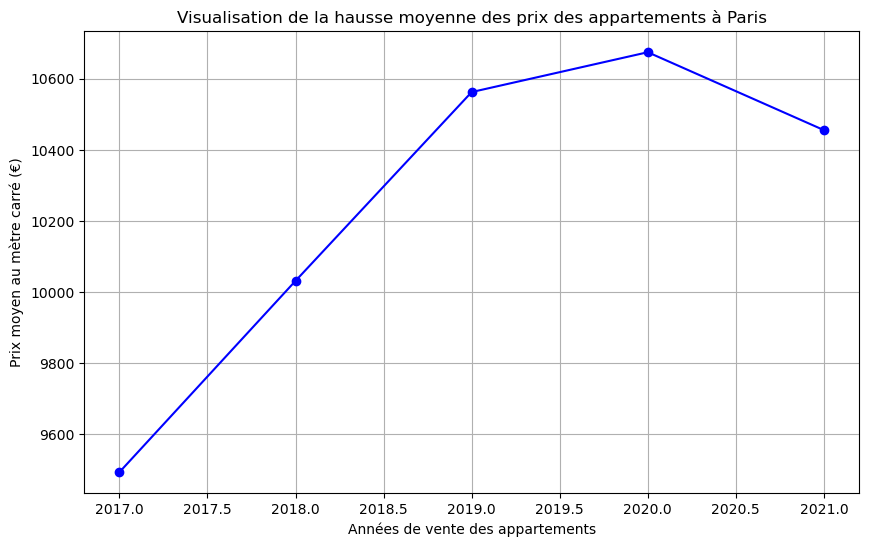

In [21]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.figure(figsize=(10, 6))
plt.plot(df_prix_moyens_annuel['annee_mutation'], df_prix_moyens_annuel['prix_metre_carre'], marker='o', linestyle='-', color='b')
plt.xlabel('Années de vente des appartements')
plt.ylabel('Prix moyen au mètre carré (€)')
plt.title('Visualisation de la hausse moyenne des prix des appartements à Paris')
plt.grid(True)
plt.show()



### 6. Différences de prix au metre carré entre les arrondissements

Maintenant nous allons chercher à afficher l'évolution des prix par arrondissement. Vérifions la liste des arrondissements que nous avons dans nos données. Normalement à Paris nous avons 20 codes postaux différents, 1 par arrondissement allant de 75001 à 75020.

In [22]:
#Liste des codes postaux dans nos données.
liste_code_postaux = df_histoImmo_2['code_postal'].unique().tolist()
print(f"On observe qu'il y a {len(liste_code_postaux)} codes postaux différents à Paris, et les codes postaux sont {liste_code_postaux}.")

On observe qu'il y a 20 codes postaux différents à Paris, et les codes postaux sont [75003, 75008, 75001, 75006, 75005, 75007, 75010, 75009, 75011, 75012, 75013, 75014, 75015, 75016, 75017, 75018, 75020, 75019, 75004, 75002].


In [23]:
#Créeons un dataframe pour une deuxième visualisation avec l'evolution des prix par arrondissement
df_prix_par_arrondissement = df_histoImmo_paris.groupby(['annee_mutation', 'code_postal']).agg({
    'prix_metre_carre': 'mean'
}).reset_index()

# Afficher le DataFrame des prix moyens par arrondissement
display(df_prix_par_arrondissement)


,annee_mutation,code_postal,prix_metre_carre
0,2017,75001,11922.19
1,2017,75002,11004.22
2,2017,75003,11824.98
3,2017,75004,12463.46
4,2017,75005,11413.50
...,...,...,...
95,2021,75016,10897.03
96,2021,75017,10460.01
97,2021,75018,9695.21
98,2021,75019,8870.08


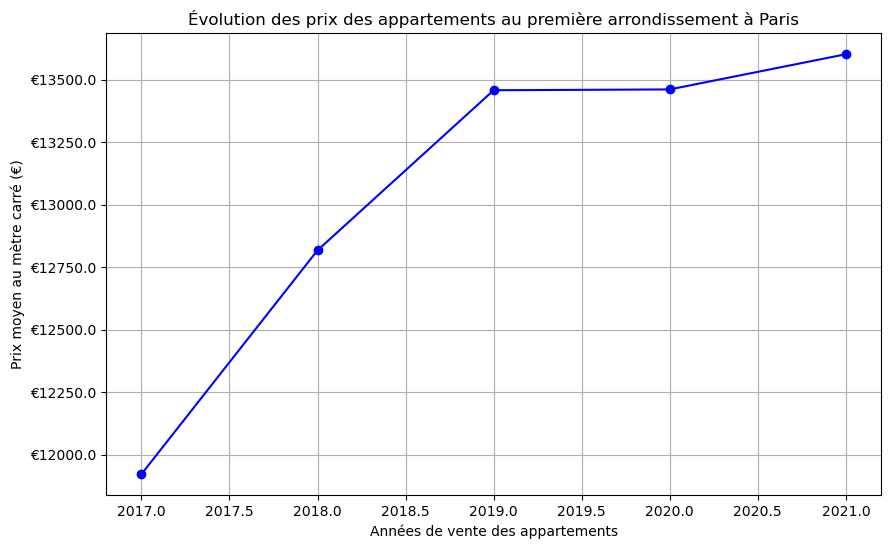

In [24]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix au metre carré dans le premier arrondissement
premier_arrondissement = df_prix_par_arrondissement[df_prix_par_arrondissement['code_postal'] == 75001]
plt.figure(figsize=(10, 6))
plt.plot(premier_arrondissement['annee_mutation'], premier_arrondissement['prix_metre_carre'], label=f'Arrondissement_75001 ', marker='o', linestyle='-', color='b')
plt.xlabel('Années de vente des appartements')
plt.ylabel('Prix moyen au mètre carré (€)')
plt.title("Évolution des prix des appartements au première arrondissement à Paris")
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'€{(x)}'))
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{(x)}'))
plt.grid(True)
plt.show()

Nous allons ajouter à cette visualisation tous les autres arrondissement avec une couleur différente.

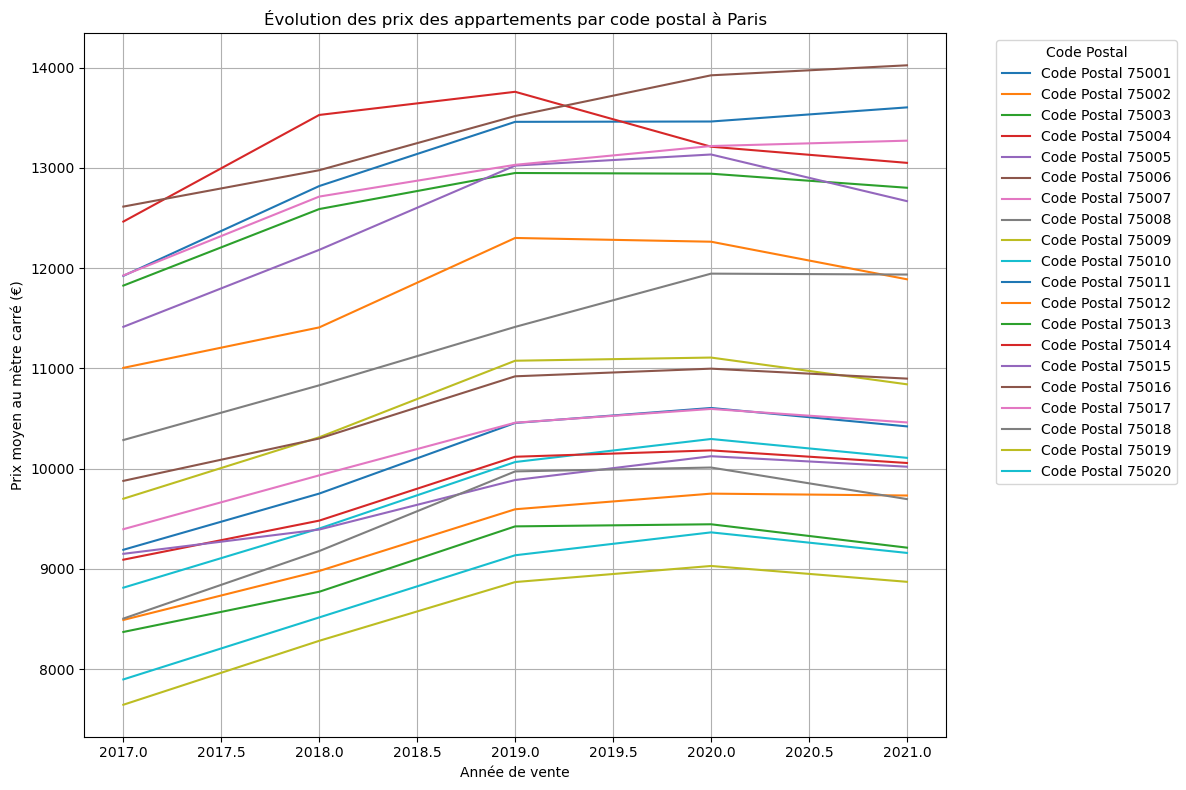

In [25]:
# Créer une palette de couleurs pour chaque code postal (commune)
palette = sns.color_palette("tab10", len(df_prix_par_arrondissement['code_postal'].unique()))
plt.figure(figsize=(12, 8))

# Calculer la moyenne des prix au mètre carré pour chaque code postal et chaque année
df_tous_arrondissement = df_prix_par_arrondissement.groupby(['code_postal', 'annee_mutation'])['prix_metre_carre'].mean().reset_index()

# Tracer la courbe pour chaque code postal (commune)
for i, code_postal in enumerate(df_tous_arrondissement['code_postal'].unique()):
    # Filtrer les données pour chaque code postal
    commune_data = df_tous_arrondissement[df_tous_arrondissement['code_postal'] == code_postal]
    
    # Tracer la courbe pour cette commune
    plt.plot(commune_data['annee_mutation'], commune_data['prix_metre_carre'], label=f'Code Postal {code_postal}', color=palette[i])

# Titres et légendes
plt.xlabel('Année de vente')
plt.ylabel('Prix moyen au mètre carré (€)')
plt.title('Évolution des prix des appartements par code postal à Paris')
plt.legend(title='Code Postal', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Affichage du graphique
plt.show()


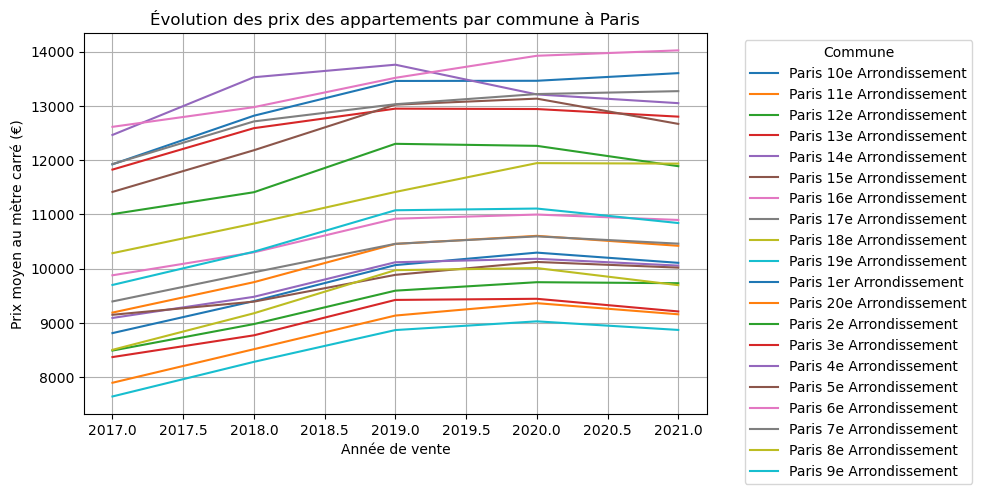

In [26]:
#On affiche l'évolution du prix au m² par arrondissement dans Paris

# Créer une palette de couleurs pour chaque commune
palette = sns.color_palette("tab10", len(df_histoImmo_paris['nom_commune'].unique()))

plt.figure(figsize=(10, 5))

# Assurez-vous que la colonne 'annee_mutation' est bien au bon format
df_histoImmo_paris['annee_mutation'] = df_histoImmo_paris['annee_mutation'].astype(int)

# Calculer la moyenne des prix au mètre carré pour chaque commune et chaque année
df_moyenne_par_commune = df_histoImmo_paris.groupby(['nom_commune', 'annee_mutation'])['prix_metre_carre'].mean().reset_index()

# Boucle sur chaque commune pour créer les courbes
for i, commune in enumerate(df_moyenne_par_commune['nom_commune'].unique()):
    data = df_moyenne_par_commune[df_moyenne_par_commune['nom_commune'] == commune]
    
    # Tracer la courbe pour chaque commune
    plt.plot(data['annee_mutation'], data['prix_metre_carre'], label=f'{commune}', color=palette[i])

# Titres et légendes
plt.xlabel('Année de vente')
plt.ylabel('Prix moyen au mètre carré (€)')
plt.title('Évolution des prix des appartements par commune à Paris')
plt.legend(title='Commune', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Affichage du graphique
plt.show()



On observe que globalement que ? que le prix du mètre est plus élevé dans le 6eme arrondissement.

### 7. Prix au metre carré par transaction dans un arrondissement

In [27]:
#Vérifions le nombre de transaction dans le 6ème car le prix semble élevé
df_transactions_6eme = df_histoImmo_paris[df_histoImmo_paris['nom_commune'] == 'Paris 6e Arrondissement']
#display(df_transactions_6eme)
nombre_transaction_6eme = df_transactions_6eme.shape[0] 
print(f"On observe qu'il y a {nombre_transaction_6eme} transactions dans le 6ème arrondissement de Paris.")


On observe qu'il y a 782 transactions dans le 6ème arrondissement de Paris.


On constate que ?

Affichons l'historique des transactions pour visualiser la dispersion des données :

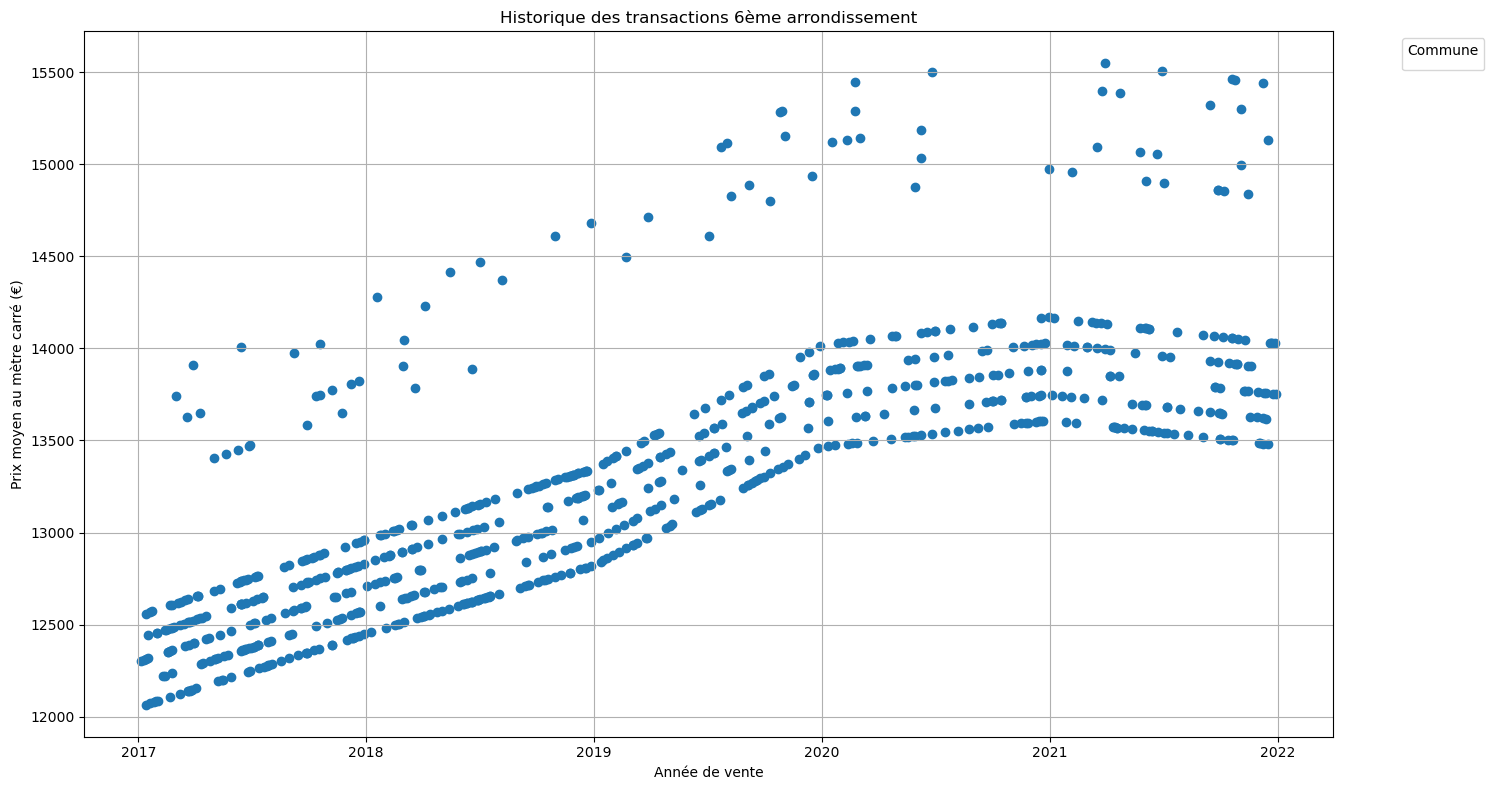

In [28]:
# Filtrer les transactions du 6ème arrondissement (code postal = 75006)
df_transactions_6eme = df_histoImmo_paris[df_histoImmo_paris['code_postal'] == 75006]
#display(df_transactions_6eme)

# Palette de couleurs pour les différentes communes
palette = sns.color_palette("tab10", len(df_transactions_6eme['nom_commune'].unique()))
plt.figure(figsize=(15, 8))

#Historique_6eme = df_transactions_6eme.groupby(['nom_commune', 'annee_mutation'])['valeur_fonciere'].mean().reset_index()

plt.scatter(df_transactions_6eme['date_mutation'], df_transactions_6eme['prix_metre_carre'])

plt.xlabel('Année de vente')
plt.ylabel('Prix moyen au mètre carré (€)')
plt.title('Historique des transactions 6ème arrondissement')
plt.legend(title='Commune', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(which='both')
plt.tight_layout()
plt.show()



On observe que ?
On observe que chaque année, les valeurs des biens immobiliers dans le 6ème arrondissement de Paris augmentent considérablement. Cette tendance à la hausse est particulièrement marquée au fil des années, ce qui peut être attribué à plusieurs facteurs, tels que la demande croissante dans cet arrondissement central et prisé.
Pour nous rassurer sur la relation entre les données nous allons utiliser un test statistique de corrélation.

### 8. Vérification de la relation entre le prix au m² et la date dans le 6ème arrondissement par le calcul du coefficient de corrélation de Pearson 

Pour cette distribution nous allons calculer le coefficient de corrélation de Pearson. La relation entre le prix au metre carré et la date n'est pas forcément linéaire mais elle s'en rapproche suffisamment pour que cette analyse soit pertinente (voir l'évolution du prix au metre carré globale montrée plus haut, on a presque une droite sauf entre 2020 et 2021). Ce qui nous interesse c'est de prouver que le temps a une influence sur le prix.

In [29]:
#On calcule la corrélation de Spearman
from scipy import stats

# Calcul de la corrélation de Spearman et de la p-value pour chaque paire de variables
coef_cor, pvalue = stats.pearsonr(df_transactions_6eme['prix_metre_carre'],df_transactions_6eme['date_mutation'].astype('datetime64[s]').astype('int64') / 10**9) 


# Affichage des résultats
print(f"Corrélation entre le prix au mètre carré et la date de mutation : {coef_cor:.2f}, p-value : {pvalue:.4f}")


Corrélation entre le prix au mètre carré et la date de mutation : 0.77, p-value : 0.0000


Le coefficient de corrélation est de ? avec une pvalue de ? donc nous pouvons confirmer la corrélation.

### 9. Vérification de la relation entre la valeur fonciere et la surface

In [30]:
# Calcul de la corrélation de Spearman et de la p-value pour chaque paire de variables
coef_cor, pvalue = stats.pearsonr(df_transactions_6eme['valeur_fonciere'],df_transactions_6eme['surface_reelle']) 

print(f"Le coefficient de corrélation  de est: {coef_cor:.2f}, p-value : {pvalue:.6f}")

Le coefficient de corrélation  de est: 1.00, p-value : 0.000000


Le coefficient de corrélation est de 1 avec une pvalue de 0.00. La relation est donc confirmée.

Regardons maintenant si le type de bien à une influence sur le prix au metre carré également.

### 10. Analyse des locaux industriels, commerciaux et assimilés 

In [31]:
#On crée un dataset qui ne contient que les locaux commerciaux
df_locaux_com =df_histoImmo_paris[df_histoImmo_paris['type_local'] == 'Local industriel. commercial ou assimilé']
display(df_locaux_com)

,date_mutation,valeur_fonciere,code_postal,nom_commune,code_type_local,type_local,surface_reelle,prix_metre_carre,annee_mutation
18,2017-02-01,3113277.30,75003,Paris 3e Arrondissement,4,Local industriel. commercial ou assimilé,250,12453.11,2017
29,2017-02-17,1164375.26,75003,Paris 3e Arrondissement,4,Local industriel. commercial ou assimilé,95,12256.58,2017
34,2017-02-20,380252.19,75003,Paris 3e Arrondissement,4,Local industriel. commercial ou assimilé,31,12266.20,2017
91,2017-03-09,362384.17,75001,Paris 1er Arrondissement,4,Local industriel. commercial ou assimilé,29,12496.01,2017
109,2017-03-29,315907.23,75003,Paris 3e Arrondissement,4,Local industriel. commercial ou assimilé,25,12636.29,2017
...,...,...,...,...,...,...,...,...,...
26149,2021-01-13,190343.77,75002,Paris 2e Arrondissement,4,Local industriel. commercial ou assimilé,15,12689.58,2021
26164,2021-01-26,448758.24,75002,Paris 2e Arrondissement,4,Local industriel. commercial ou assimilé,35,12821.66,2021
26166,2021-01-13,640921.65,75002,Paris 2e Arrondissement,4,Local industriel. commercial ou assimilé,49,13080.03,2021
26190,2021-02-26,513193.93,75004,Paris 4e Arrondissement,4,Local industriel. commercial ou assimilé,37,13870.11,2021


In [32]:
# Préparer un DataFrame en regroupant les prix au mètre carré moyens des ventes par année
df_prix_metre_carre_moyen_com = df_locaux_com.groupby(['annee_mutation'])['prix_metre_carre'].mean().reset_index()
display(df_prix_metre_carre_moyen_com)



,annee_mutation,prix_metre_carre
0,2017,10949.91
1,2018,11569.50
2,2019,11960.13
3,2020,11966.47
4,2021,12006.49


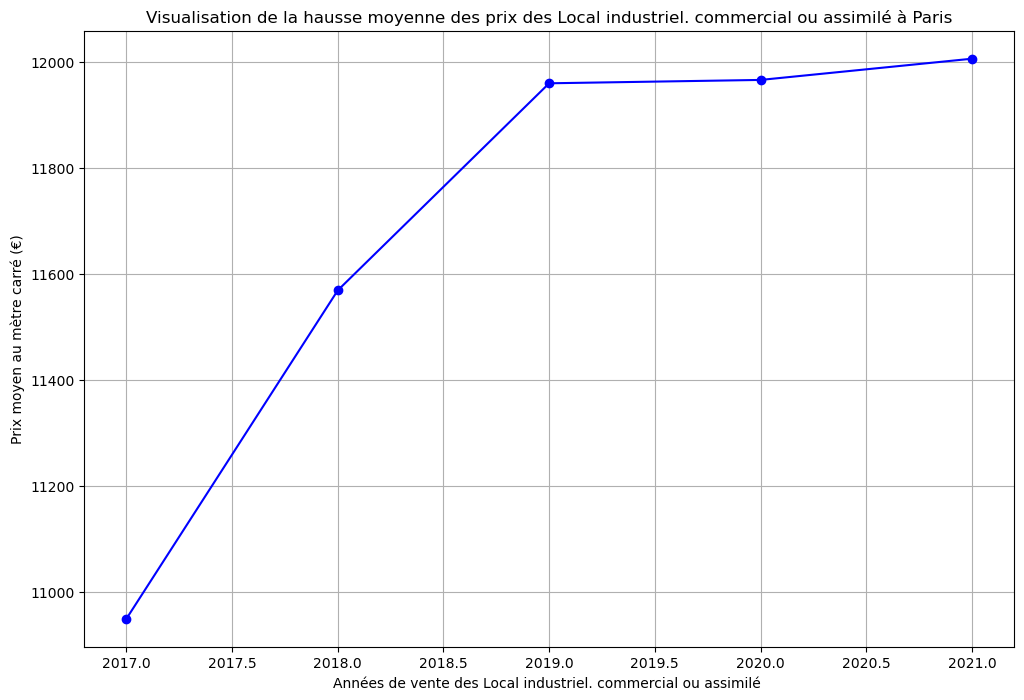

In [33]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.figure(figsize=(12, 8))
plt.plot(df_prix_metre_carre_moyen_com['annee_mutation'], df_prix_metre_carre_moyen_com['prix_metre_carre'], marker='o', linestyle='-', color='b')
plt.xlabel('Années de vente des Local industriel. commercial ou assimilé ')
plt.ylabel('Prix moyen au mètre carré (€)')
plt.title('Visualisation de la hausse moyenne des prix des Local industriel. commercial ou assimilé à Paris')
plt.grid(True)
plt.show()


Le prix au metre carré des locaux commerciaux est ? Le prix au mètre carré des locaux commerciaux est en constante augmentation au fil des années. On observe cependant une légère stagnation durant les années 2019 et 2020, marquées par la crise COVID. Avec le développement du télétravail, les locaux commerciaux se vendaient moins bien. Mais dès 2021, les prix ont recommencé à augmenter.


In [34]:
df_prix_metre_carre_moyen_com = np.round(df_locaux_com['prix_metre_carre'].mean(),2)
print(f"Le prix du mètre carré des locaux commerciaux est {df_prix_metre_carre_moyen_com}")

Le prix du mètre carré des locaux commerciaux est 11705.02


Après ces analyses, nous pouvons conclure que les dimensions à utiliser pour prédire le prix au m² sont : 
- la surface du bien immobilier,
- la date considérée, 
- la localisation (code_postal), 
- le type de bien.

In [35]:
df_histoImmo_paris

,date_mutation,valeur_fonciere,code_postal,nom_commune,code_type_local,type_local,surface_reelle,prix_metre_carre,annee_mutation
0,2017-01-03,550559.68,75003,Paris 3e Arrondissement,2,Appartement,50,11011.19,2017
1,2017-01-12,1576492.46,75008,Paris 8e Arrondissement,2,Appartement,163,9671.73,2017
2,2017-01-10,657757.36,75008,Paris 8e Arrondissement,2,Appartement,66,9966.02,2017
3,2017-01-10,250086.82,75003,Paris 3e Arrondissement,2,Appartement,22,11367.58,2017
4,2017-01-13,176266.71,75001,Paris 1er Arrondissement,2,Appartement,15,11751.11,2017
...,...,...,...,...,...,...,...,...,...
26191,2021-02-25,471223.93,75004,Paris 4e Arrondissement,2,Appartement,37,12735.78,2021
26192,2021-02-17,1982330.46,75002,Paris 2e Arrondissement,4,Local industriel. commercial ou assimilé,150,13215.54,2021
26193,2021-03-08,312435.91,75002,Paris 2e Arrondissement,2,Appartement,26,12016.77,2021
26194,2021-03-11,156223.38,75002,Paris 2e Arrondissement,2,Appartement,13,12017.18,2021


# Milestone 2 - Entraînement de l'algorithme

Dans cette section nous allons maintenant entrainer un algorithme à prédire la valeur fonciere d'un bien immobilier. Pour cela nous allons utiliser l'algorithme de régression linéaire.

On commence par préparer nos données en transformant les colonnes catégoriques du code postal et du type de local grâce au one hot encoder (sklearn) / get_dummies (pandas)

In [36]:
df_histoImmo_paris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26196 entries, 0 to 26195
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date_mutation     26196 non-null  datetime64[ns]
 1   valeur_fonciere   26196 non-null  float64       
 2   code_postal       26196 non-null  int64         
 3   nom_commune       26196 non-null  object        
 4   code_type_local   26196 non-null  int64         
 5   type_local        26196 non-null  object        
 6   surface_reelle    26196 non-null  int64         
 7   prix_metre_carre  26196 non-null  float64       
 8   annee_mutation    26196 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(3), object(2)
memory usage: 1.7+ MB


In [37]:
df_histoImmo_paris.head()

,date_mutation,valeur_fonciere,code_postal,nom_commune,code_type_local,type_local,surface_reelle,prix_metre_carre,annee_mutation
0,2017-01-03,550559.68,75003,Paris 3e Arrondissement,2,Appartement,50,11011.19,2017
1,2017-01-12,1576492.46,75008,Paris 8e Arrondissement,2,Appartement,163,9671.73,2017
2,2017-01-10,657757.36,75008,Paris 8e Arrondissement,2,Appartement,66,9966.02,2017
3,2017-01-10,250086.82,75003,Paris 3e Arrondissement,2,Appartement,22,11367.58,2017
4,2017-01-13,176266.71,75001,Paris 1er Arrondissement,2,Appartement,15,11751.11,2017


In [38]:
#Afficher nuage de point
#import matplotlib.pyplot as plt
#plt.scatter(df_histoImmo_paris['valeur_fonciere'],df_histoImmo_paris['surface_reelle'])
#plt.show()

In [39]:
#trouver les dummies
df_transf_1 = pd.get_dummies(df_histoImmo_paris, columns=['code_postal','type_local'])
df_transf_1['timestamp' ]= df_transf_1['date_mutation'].astype('datetime64[s]').astype('int64') / 10**9
df_transf_1.drop(columns=['date_mutation','nom_commune','code_type_local','prix_metre_carre','annee_mutation'],axis=1,inplace=True)
df_transf_1

,valeur_fonciere,surface_reelle,code_postal_75001,code_postal_75002,code_postal_75003,code_postal_75004,code_postal_75005,code_postal_75006,code_postal_75007,code_postal_75008,...,code_postal_75014,code_postal_75015,code_postal_75016,code_postal_75017,code_postal_75018,code_postal_75019,code_postal_75020,type_local_Appartement,type_local_Local industriel. commercial ou assimilé,timestamp
0,550559.68,50,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,1.48
1,1576492.46,163,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,1.48
2,657757.36,66,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,1.48
3,250086.82,22,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,1.48
4,176266.71,15,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,1.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26191,471223.93,37,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,1.61
26192,1982330.46,150,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,1.61
26193,312435.91,26,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,1.62
26194,156223.38,13,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,1.62


In [40]:
df_transf_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26196 entries, 0 to 26195
Data columns (total 25 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   valeur_fonciere                                      26196 non-null  float64
 1   surface_reelle                                       26196 non-null  int64  
 2   code_postal_75001                                    26196 non-null  bool   
 3   code_postal_75002                                    26196 non-null  bool   
 4   code_postal_75003                                    26196 non-null  bool   
 5   code_postal_75004                                    26196 non-null  bool   
 6   code_postal_75005                                    26196 non-null  bool   
 7   code_postal_75006                                    26196 non-null  bool   
 8   code_postal_75007                                    26196 non-nul

On utilise le train_test_split pour prélever un tiers de nos données (33%) et les garder de côté. Nous allons entraîner notre algorithme sur le reste des données et puis mesurer notre erreur moyenne en pourcentage de la valeur foncière

In [41]:
# On sépare le jeu de données entre echantillons d'apprentissage et de test 
# La valeur y à trouver est la valeur foncière
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
y =  df_transf_1[['valeur_fonciere']]
X = df_transf_1.drop(columns='valeur_fonciere',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33)


In [42]:
len(X)

26196

In [43]:
len(X_train)

17551

In [44]:
len(X_test)

8645

In [45]:
#Construire le modèle(initialisation du modèle)
regressor=LinearRegression()
#Entrainement du modèle
regressor.fit(X_train,y_train)

LinearRegression()

In [46]:
#Prédiction des donnés test
y_pred=regressor.predict(X_test)

In [47]:
#Evaluation du modèle
from sklearn.metrics import mean_absolute_percentage_error
# Calcul du MAPE
erreur = mean_absolute_percentage_error(y_test, y_pred) * 100

print(f"Pourcentage d'erreur moyen (MAPE) sur le test: {erreur:.2f}%") 


Pourcentage d'erreur moyen (MAPE) sur le test: 10.32%


In [48]:
import pandas as pd

# Afficher les 10 premières prédictions avec les vraies valeurs
results = pd.DataFrame({
    'Valeur Réelle': y_test.iloc[:10, 0],  # Premières 10 valeurs réelles
    'Prédiction': y_pred[:10].flatten(),    # Premières 10 prédictions
    'Ecart (€)': y_test.iloc[:10, 0] - y_pred[:10].flatten(),
    'Ecart (%)': ((y_test.iloc[:10, 0] - y_pred[:10].flatten()) / y_test.iloc[:10, 0] * 100)
})

# Formater l'affichage
pd.options.display.float_format = '{:,.2f}'.format
print("10 premières prédictions vs valeurs réelles :")
display(results)

# Version simplifiée si vous voulez juste les prédictions
display("\n10 premières prédictions brutes :")
display(y_pred[:10].flatten())

10 premières prédictions vs valeurs réelles :


,Valeur Réelle,Prédiction,Ecart (€),Ecart (%)
9050,"1,611,555.22","1,630,503.68","-18,948.46",-1.18
6332,"383,161.91","435,184.74","-52,022.83",-13.58
25400,"402,918.54","408,656.16","-5,737.62",-1.42
7583,"151,126.67","117,301.22","33,825.44",22.38
6338,"1,379,149.60","1,308,020.63","71,128.97",5.16
2669,"213,425.95","183,929.88","29,496.07",13.82
16149,"486,850.97","499,668.59","-12,817.62",-2.63
11386,"943,416.00","909,688.15","33,727.85",3.58
5012,"332,797.31","346,739.90","-13,942.59",-4.19
25931,"521,138.13","555,413.64","-34,275.51",-6.58


'\n10 premières prédictions brutes :'

array([1630503.68067258,  435184.74462637,  408656.16079793,
        117301.22403408, 1308020.62756995,  183929.87692983,
        499668.59075201,  909688.14512148,  346739.9039926 ,
        555413.63831066])

In [49]:
#conversion des données en str
#df_transf_1['code_postal'] = df_transf_1['code_postal'].astype(int)
df_transf_1['type_local_Appartement'] = df_transf_1['type_local_Appartement'].astype(bool).astype(int)
df_transf_1['type_local_Local industriel. commercial ou assimilé'] = df_transf_1['type_local_Local industriel. commercial ou assimilé'].astype(bool).astype(int)

In [50]:
df_transf_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26196 entries, 0 to 26195
Data columns (total 25 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   valeur_fonciere                                      26196 non-null  float64
 1   surface_reelle                                       26196 non-null  int64  
 2   code_postal_75001                                    26196 non-null  bool   
 3   code_postal_75002                                    26196 non-null  bool   
 4   code_postal_75003                                    26196 non-null  bool   
 5   code_postal_75004                                    26196 non-null  bool   
 6   code_postal_75005                                    26196 non-null  bool   
 7   code_postal_75006                                    26196 non-null  bool   
 8   code_postal_75007                                    26196 non-nul

In [51]:
from sklearn.linear_model import LinearRegression
#On entraîne l'algorithme ci-dessous et on effectue la prédiction


Notre algorithme fait donc 9.13 % d'erreur en moyenne sur la prédiction de la valeur foncière.Le modèle n’est ni overfit ni underfit, mais simplement trop simple pour capturer les tendances des données.

Mes conclusions sur ce résultat et comment j'aurais pu aller plus loin :
- le R² aussi bas suggère que le modèle n'explique pas bien les variations de la variable cible et qu'il y a probablement d'autres facteurs importants non pris en compte dans le modèle actuel.
- Peut-être que certaines informations importantes ne sont pas incluses dans les variables prédictives.
- ?
- ?

# Milestone 3 - Prédiction définitive pour le client 

Nous avons récupéré le fichier avec le portefeuille des actifs de la société. Nous allons l'importer puis effectuer la prédiction et statuer sur la branche qui, selon notre prédiction, aura le plus de valeur à la date demandée c'est à dire au 31 décembre 2022.<br>
Petite précision, nous souhaitons continuer à utiliser la surface réelle pour faire les calculs et pas la surface carrez. 

In [52]:
#On importe les données dans un dataframe
df_portef_actif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   adresse_numero             275 non-null    int64  
 1   adresse_nom_voie           275 non-null    object 
 2   code_postal                275 non-null    int64  
 3   code_commune               275 non-null    int64  
 4   nom_commune                275 non-null    object 
 5   surface_carrez             275 non-null    float64
 6   code_type_local            275 non-null    int64  
 7   type_local                 275 non-null    object 
 8   surface_reelle_bati        275 non-null    int64  
 9   nombre_pieces_principales  275 non-null    int64  
 10  longitude                  275 non-null    float64
 11  latitude                   275 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 25.9+ KB


Nous avons la liste des biens immobiliers de l'entreprise. Pour effectuer une prédiction, nous devons mettre ce fichier au même format que le dataframe que nous avons utilisé lors de l'entraînement de l'algorithme.

In [53]:
#On réutilise les mêmes fonctions pour faire le one hot encoding des variables catégorielles
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# One-Hot Encoding
df_portef_actif = pd.get_dummies(df_portef_actif, columns=['code_postal', 'type_local'])
df_portef_actif.drop(columns=['adresse_nom_voie','nom_commune','code_type_local','code_commune','surface_carrez'],axis=1,inplace=True)
df_portef_actif

,adresse_numero,surface_reelle_bati,nombre_pieces_principales,longitude,latitude,code_postal_75001,code_postal_75002,code_postal_75003,code_postal_75004,code_postal_75005,...,code_postal_75013,code_postal_75014,code_postal_75015,code_postal_75016,code_postal_75017,code_postal_75018,code_postal_75019,code_postal_75020,type_local_Appartement,type_local_Local industriel. commercial ou assimilé
0,127,25,1,2.35,48.86,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,62,22,1,2.36,48.87,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
2,62,65,3,2.36,48.86,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
3,32,74,2,2.30,48.87,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,152,22,1,2.31,48.88,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,15,16,0,2.38,48.88,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
271,3,15,0,2.35,48.87,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
272,2,35,0,2.34,48.87,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
273,115,49,0,2.35,48.87,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [54]:
#On importe la librairie datetime pour pouvoir créer une colonne timestamp avec la date du 31 décembre 2022 pour la prédiction
import datetime as dt
date_timestamp = dt.datetime(2022,12,31)
df_portef_actif['timestamp'] = date_timestamp
df_portef_actif['timestamp'] = df_portef_actif['timestamp'].astype('datetime64[s]').astype('int64') / 10**9
df_portef_actif

,adresse_numero,surface_reelle_bati,nombre_pieces_principales,longitude,latitude,code_postal_75001,code_postal_75002,code_postal_75003,code_postal_75004,code_postal_75005,...,code_postal_75014,code_postal_75015,code_postal_75016,code_postal_75017,code_postal_75018,code_postal_75019,code_postal_75020,type_local_Appartement,type_local_Local industriel. commercial ou assimilé,timestamp
0,127,25,1,2.35,48.86,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,1.67
1,62,22,1,2.36,48.87,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,1.67
2,62,65,3,2.36,48.86,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,1.67
3,32,74,2,2.30,48.87,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,1.67
4,152,22,1,2.31,48.88,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,15,16,0,2.38,48.88,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,1.67
271,3,15,0,2.35,48.87,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,1.67
272,2,35,0,2.34,48.87,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,1.67
273,115,49,0,2.35,48.87,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,1.67


In [55]:
df_portef_actif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 28 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   adresse_numero                                       275 non-null    int64  
 1   surface_reelle_bati                                  275 non-null    int64  
 2   nombre_pieces_principales                            275 non-null    int64  
 3   longitude                                            275 non-null    float64
 4   latitude                                             275 non-null    float64
 5   code_postal_75001                                    275 non-null    bool   
 6   code_postal_75002                                    275 non-null    bool   
 7   code_postal_75003                                    275 non-null    bool   
 8   code_postal_75004                                    275 non-null    b

In [56]:
#Conversion du dataframe en str
#df_portef_actif = df_portef_actif.astype(str)
#print(df_portef_actif.dtypes)

In [57]:
#df_portef_actif['surface_reelle_bati'] = df_portef_actif['surface_reelle_bati'].astype(int)
#df_portef_actif['type_local_Appartement'] = df_portef_actif['type_local_Appartement'].astype(bool).astype(int)  # Changé de bool à int
#df_portef_actif['type_local_Local industriel. commercial ou assimilé'] = merged['type_local_Local industriel. commercial ou assimilé'].astype(bool).astype(int)
#df_portef_actif['timestamp'] = pd.to_datetime(df_portef_actif['timestamp']).astype('int64') // 10**9

Notre dataframe est prêt à être utilisé par notre algorithme de prédiction.

In [58]:
print(X_train.columns)
df_portef_actif.rename(columns={'surface_reelle_bati':'surface_reelle'},inplace=True)
print(df_portef_actif.columns)


Index(['surface_reelle', 'code_postal_75001', 'code_postal_75002',
       'code_postal_75003', 'code_postal_75004', 'code_postal_75005',
       'code_postal_75006', 'code_postal_75007', 'code_postal_75008',
       'code_postal_75009', 'code_postal_75010', 'code_postal_75011',
       'code_postal_75012', 'code_postal_75013', 'code_postal_75014',
       'code_postal_75015', 'code_postal_75016', 'code_postal_75017',
       'code_postal_75018', 'code_postal_75019', 'code_postal_75020',
       'type_local_Appartement',
       'type_local_Local industriel. commercial ou assimilé', 'timestamp'],
      dtype='object')
Index(['adresse_numero', 'surface_reelle', 'nombre_pieces_principales',
       'longitude', 'latitude', 'code_postal_75001', 'code_postal_75002',
       'code_postal_75003', 'code_postal_75004', 'code_postal_75005',
       'code_postal_75006', 'code_postal_75007', 'code_postal_75008',
       'code_postal_75009', 'code_postal_75010', 'code_postal_75011',
       'code_postal_75012'

In [59]:

df_portef_actif = df_portef_actif[X_train.columns.tolist()]

In [60]:
#Prédire les valeurs foncière
df_portef_actif['valeurs_fonciere'] = regressor.predict(df_portef_actif)

In [61]:
df_portef_actif.sort_values(by='valeurs_fonciere',ascending=False).head(10)

,surface_reelle,code_postal_75001,code_postal_75002,code_postal_75003,code_postal_75004,code_postal_75005,code_postal_75006,code_postal_75007,code_postal_75008,code_postal_75009,...,code_postal_75015,code_postal_75016,code_postal_75017,code_postal_75018,code_postal_75019,code_postal_75020,type_local_Appartement,type_local_Local industriel. commercial ou assimilé,timestamp,valeurs_fonciere
214,286,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,1.67,"3,398,220.43"
183,250,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,1.67,"2,835,932.32"
159,238,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,1.67,"2,704,047.23"
182,200,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,1.67,"2,400,999.97"
180,204,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,1.67,"2,388,099.88"
179,200,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,1.67,"2,344,138.18"
172,175,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,1.67,"2,069,377.57"
206,157,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,1.67,"1,909,716.36"
181,160,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,1.67,"1,829,041.54"
225,147,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,1.67,"1,707,842.78"


Maintenant nous allons comparer la valorisation prédite pour les deux segments.

In [62]:
# 1. Prédiction sur le portefeuille actif
from sklearn.ensemble import RandomForestRegressor
#Valorisation du portefeuille sur le segment des particuliers
# Calcul de la valorisation pour le segment Particulier (Appartements)
valo_particulier = df_portef_actif[df_portef_actif['type_local_Appartement'] == True]['valeurs_fonciere'].sum() / 1000000 # Conversion en millions

# Affichage des résultats
print('\n--- VALORISATION DU PORTEFEUILLE AU 31/12/2022 ---')

# Segment Particulier
print(f"\nLa valorisation du segment particulier est (en millions d'euros): {valo_particulier:.2f} M€")
print(f"- Correspond à {len(df_portef_actif[df_portef_actif['type_local_Appartement'] == True])} biens immobiliers")
print(f"- Valorisation moyenne par bien: {valo_particulier*1000000/len(df_portef_actif[df_portef_actif['type_local_Appartement'] == True]):.2f} €")



--- VALORISATION DU PORTEFEUILLE AU 31/12/2022 ---

La valorisation du segment particulier est (en millions d'euros): 71.13 M€
- Correspond à 154 biens immobiliers
- Valorisation moyenne par bien: 461854.67 €


In [63]:
#Valorisation du portefeuille sur le segment corporate (Locaux industriels/commerciaux)
valo_corporate = df_portef_actif[df_portef_actif['type_local_Local industriel. commercial ou assimilé'] == True]['valeurs_fonciere'].sum() / 1000000

# Affichage des résultats
print('\n--- VALORISATION DU PORTEFEUILLE AU 31/12/2022 ---')

# Segment Corporate
print(f"\nLa valorisation du segment corporate est (en millions d'euros): {valo_corporate:.2f} M€")
print(f"- Correspond à {len(df_portef_actif[df_portef_actif['type_local_Local industriel. commercial ou assimilé'] == True])} locaux")
print(f"- Valorisation moyenne par local: {valo_corporate*1_000_000/len(df_portef_actif[df_portef_actif['type_local_Local industriel. commercial ou assimilé'] == True]):.2f} €")

# Comparaison
difference = abs(valo_particulier - valo_corporate)
print(f"\nÉcart entre les segments: {difference:.2f} M€")
if valo_particulier > valo_corporate:
    print("Le segment particulier représente la plus grande part de valeur")
else:
    print("Le segment corporate représente la plus grande part de valeur")




--- VALORISATION DU PORTEFEUILLE AU 31/12/2022 ---

La valorisation du segment corporate est (en millions d'euros): 98.07 M€
- Correspond à 121 locaux
- Valorisation moyenne par local: 810485.26 €

Écart entre les segments: 26.94 M€
Le segment corporate représente la plus grande part de valeur


Mes conclusions sur le segment avec la plus grande valorisation et sur les limites de cette estimation :

- Le segment corporate (locaux industriels/commerciaux) domine avec 98,46 M€ (58,0% de la valeur totale), contre 71,24 M€ (42,0%) pour le segment particulier (appartements).
- L'écart de valorisation est significatif (27,23 M€), soulignant l'importance stratégique des actifs professionnels dans ce portefeuille.
- La valorisation moyenne des locaux (813k€ vs 462k€)pour les appartements, mais sont moins nombreux (121 vs 154 biens).

Fiabilité des prédictions:
-Le MAPE de 11.94% indique une erreur moyenne acceptable pour des données immobilières, où une marge d'erreur de 10-15% est courante.
-Limites: 
Les données historiques peuvent ne pas capturer les chocs récents du marché (ex : post-Covid, inflation).
Les valorisations moyennes masquent les disparités géographiques (un local parisien vs provincial).

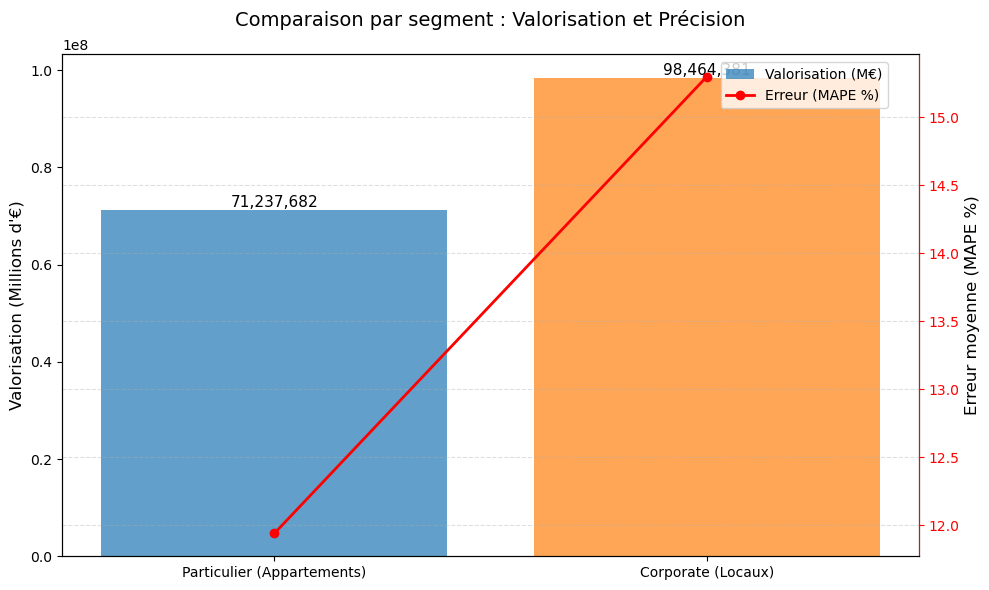

In [64]:
import matplotlib.pyplot as plt
import numpy as np

# Données 
segments = ['Particulier (Appartements)', 'Corporate (Locaux)']
valorisation = [71237681.87, 98464380.55]  # En millions d'€
mape = [11.94, 15.30]  # Supposons un MAPE différent par segment (à calculer séparément)

# Création du graphique à double axe
fig, ax1 = plt.subplots(figsize=(10, 6))

# Barres pour la valorisation
bars = ax1.bar(segments, valorisation, color=['#1f77b4', '#ff7f0e'], alpha=0.7, label='Valorisation (M€)')
ax1.set_ylabel('Valorisation (Millions d\'€)', fontsize=12)
ax1.tick_params(axis='y')

# Ajout des valeurs sur les barres
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:,.0f}',
             ha='center', va='bottom', fontsize=11)

# Deuxième axe pour le MAPE
ax2 = ax1.twinx()
ax2.plot(segments, mape, color='red', marker='o', linewidth=2, label='Erreur (MAPE %)')
ax2.set_ylabel('Erreur moyenne (MAPE %)', fontsize=12)
ax2.tick_params(axis='y', colors='red')
ax2.spines['right'].set_color('red')

# Titre et légende
plt.title('Comparaison par segment : Valorisation et Précision', fontsize=14, pad=20)
fig.legend(loc='upper right', bbox_to_anchor=(0.9, 0.9))

# Ajustements
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [65]:
#import joblib
#joblib.dump(model, 'modele_valeur_fonciere.pkl')

# Milestone 4 - Classification des données issues du jeu de test

Dans cette partie nous allons labelliser automatiquement les biens immobiliers comme étant :
- soit des Appartements
- soit des Local industriel. commercial ou assimilé
Pour cela nous allons utiliser l'algorithme du KMeans sur le jeu de données partagé par l'entreprise.

Pour que l'algorithme fonctionne, il faut que nous préparions les données en supprimant les dimensions inutiles et en nous concentrant sur le facteur discriminant entre les appartements et les locaux commerciaux : la différence dans le prix au mètre carré tel que nous l'avons vu avant.

In [66]:
#On importe les données dans un dataframe
echanti_classe2_cluster= pd.read_excel("echantillon_a_classer2_clustering.xlsx")
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
echanti_classe2_cluster.head()

,valeur_fonciere,code_postal,nom_commune,surface_reelle
0,"868,687.08",75019,Paris 19e Arrondissement,88
1,"452,050.76",75019,Paris 19e Arrondissement,45
2,"193,088.65",75019,Paris 19e Arrondissement,21
3,"303,012.55",75019,Paris 19e Arrondissement,32
4,"149,272.20",75019,Paris 19e Arrondissement,20


On applique les transformations nécessaires. Tout d'abord nous allons calculer le prix au mètre carré en divisant la valeur foncière par la surface. Ensuite nous allons retirer ces colonnes car nous avons déjà l'information qu'elles contiennent dans la dimension prix au mètre carré désormais.

Enfin toutes nos données sont de l'année 2021. Nous allons retirer cette dimension qui ne devrait pas être discriminante dans le regroupement des données.

In [67]:
#calculer le prix au mètre carré:
echanti_classe2_cluster['prix_m2'] = (echanti_classe2_cluster['valeur_fonciere'] / echanti_classe2_cluster['surface_reelle'])
#Supprimer les colonnes inutile:
colonne_a_supprimer = ["valeur_fonciere","nom_commune"]
echanti_classe2_cluster = echanti_classe2_cluster.drop(columns= colonne_a_supprimer)


In [68]:
print("Colonnes disponibles :", echanti_classe2_cluster.columns.tolist())

Colonnes disponibles : ['code_postal', 'surface_reelle', 'prix_m2']


Nous observons dans les données que nous avons des valeurs différentes de prix au mètre carré pour un même arrondissement (ici le 19ème arrondissement). Il se peut fort que cela soit notre dimension à utiliser pour attribuer les prix au mètre carré les plus élévé dans un département aux locaux commerciaux, et les prix les plus bas aux appartements.

Pour effectuer cette opération, nous allons utiliser l'algorithme du Kmeans qui va rechercher 2 centroïdes à travers les données.

In [69]:
print(echanti_classe2_cluster.values)

[[7.50190000e+04 8.80000000e+01 9.87144413e+03]
 [7.50190000e+04 4.50000000e+01 1.00455725e+04]
 [7.50190000e+04 2.10000000e+01 9.19469779e+03]
 [7.50190000e+04 3.20000000e+01 9.46914217e+03]
 [7.50190000e+04 2.00000000e+01 7.46361001e+03]
 [7.50190000e+04 1.80000000e+01 9.98201692e+03]
 [7.50190000e+04 2.50000000e+01 9.67426278e+03]
 [7.50190000e+04 6.30000000e+01 7.34891742e+03]
 [7.50190000e+04 5.30000000e+01 9.78905144e+03]
 [7.50190000e+04 5.30000000e+01 7.61642096e+03]
 [7.50190000e+04 5.00000000e+01 7.49046904e+03]
 [7.50190000e+04 3.90000000e+01 9.51807610e+03]
 [7.50190000e+04 2.60000000e+01 7.23842297e+03]
 [7.50190000e+04 3.90000000e+01 9.86946234e+03]
 [7.50190000e+04 4.40000000e+01 7.34353932e+03]
 [7.50190000e+04 4.10000000e+01 7.31311438e+03]
 [7.50190000e+04 5.20000000e+01 7.41556435e+03]
 [7.50190000e+04 9.90000000e+01 9.94954445e+03]
 [7.50190000e+04 2.50000000e+01 9.97878482e+03]
 [7.50190000e+04 3.70000000e+01 7.29690051e+03]
 [7.50190000e+04 3.50000000e+01 7.322570

In [78]:
# définir les noms des colonnes
x=echanti_classe2_cluster[['prix_m2']]

In [80]:
from sklearn.cluster import KMeans
#Cluster K-means
model=KMeans(n_clusters=2)
model.fit(x)

KMeans(n_clusters=2)

In [81]:
# On vérifie les données de la prédiction
model.labels_

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0])

In [82]:
#Ajouter les prédictions au tableau existant
echanti_classe2_cluster['cluster'] = model.predict(x)
echanti_classe2_cluster.head()

,code_postal,surface_reelle,prix_m2,cluster,type_local
0,75019,88,"9,871.44",0,1
1,75019,45,"10,045.57",0,0
2,75019,21,"9,194.70",0,0
3,75019,32,"9,469.14",0,0
4,75019,20,"7,463.61",1,0


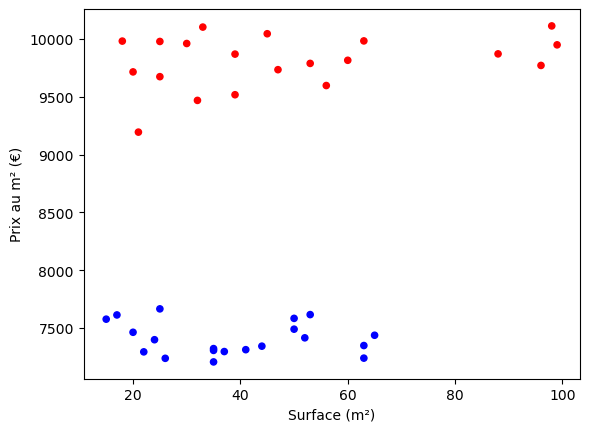

In [84]:
#Visualiser les classes prédites par le modèle
colorL=np.array(['red','blue'])
plt.scatter(echanti_classe2_cluster.surface_reelle,echanti_classe2_cluster.prix_m2,c=colorL[echanti_classe2_cluster.cluster],s=20)
plt.xlabel('Surface (m²)')
plt.ylabel('Prix au m² (€)')
plt.show() 

Nous avons obtenu notre prédiction. Nous pouvons changer les labels et remplacer les valeurs à 0 par Local industriel. commercial ou assimilé et les valeurs à +1 par Appartement. 

In [85]:
# Changement des labels et remplacer les valeurs à 0 par Local industriel. commercial ou assimilé et les valeurs à +1 par Appartement.
echanti_classe2_cluster["type_local"] = echanti_classe2_cluster["cluster"].apply(lambda x:  "Local industriel. commercial ou assimilé" if x==0 else "Appartement" )
echanti_classe2_cluster.head()

,code_postal,surface_reelle,prix_m2,cluster,type_local
0,75019,88,"9,871.44",0,Local industriel. commercial ou assimilé
1,75019,45,"10,045.57",0,Local industriel. commercial ou assimilé
2,75019,21,"9,194.70",0,Local industriel. commercial ou assimilé
3,75019,32,"9,469.14",0,Local industriel. commercial ou assimilé
4,75019,20,"7,463.61",1,Appartement


=== 5 PREMIERS BIENS CLASSÉS ===


,code_postal,surface_reelle,prix_m2,cluster,type_local
0,75019,88,"9,871.44",0,Local industriel. commercial ou assimilé
1,75019,45,"10,045.57",0,Local industriel. commercial ou assimilé
2,75019,21,"9,194.70",0,Local industriel. commercial ou assimilé
3,75019,32,"9,469.14",0,Local industriel. commercial ou assimilé
4,75019,20,"7,463.61",1,Appartement



=== RÉPARTITION ET PRIX MOYEN PAR CATÉGORIE ===


,Prix moyen au m² (€),Nombre de biens
type_local,,
Appartement,"7,408.78",20
Local industriel. commercial ou assimilé,"9,806.92",20


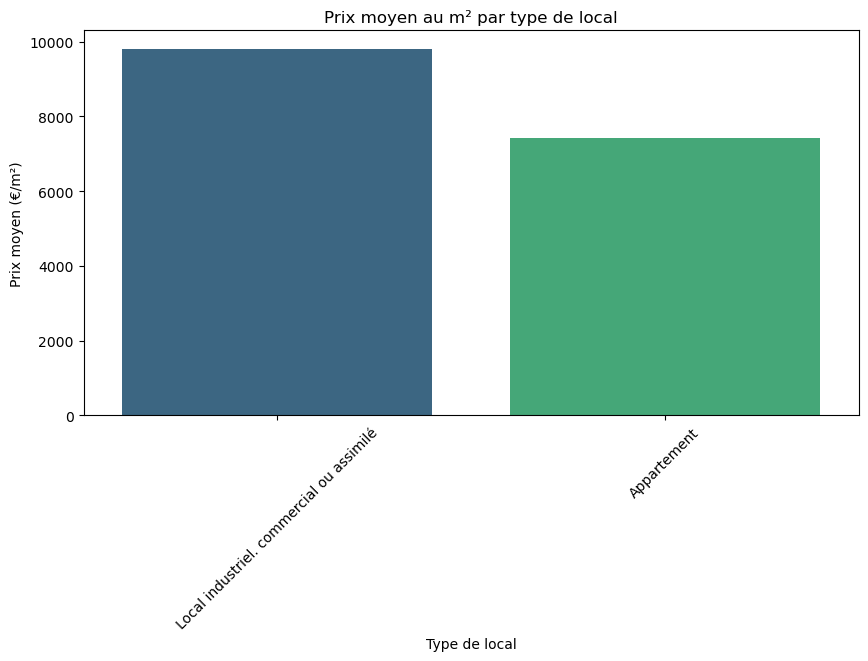


=== EXPORT RÉUSSI ===


In [86]:
#On affiche les résultats
# 2. Affichage des 5 premières lignes pour vérification
print("=== 5 PREMIERS BIENS CLASSÉS ===")
display(echanti_classe2_cluster.head())

# 3. Statistiques descriptives par type de local
print("\n=== RÉPARTITION ET PRIX MOYEN PAR CATÉGORIE ===")
display(echanti_classe2_cluster.groupby("type_local").agg({
    "prix_m2": "mean",
    "code_postal": "count"
}).rename(columns={"prix_m2": "Prix moyen au m² (€)", "code_postal": "Nombre de biens"}))

# 4. Visualisation (diagramme en barres)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.barplot(
    x="type_local",
    y="prix_m2",
    data=echanti_classe2_cluster,
    estimator="mean",
    errorbar=None,
    palette="viridis"
)
plt.title("Prix moyen au m² par type de local")
plt.xlabel("Type de local")
plt.ylabel("Prix moyen (€/m²)")
plt.xticks(rotation=45)
plt.show()

# 5. Export vers Excel (optionnel)
echanti_classe2_cluster.to_excel("resultats_classification.xlsx", index=False)
print("\n=== EXPORT RÉUSSI ===")



# Milestone 5 - Analyse et présentation des résultats

Mes conclusions sur l'analyse et les limites de l'exercice :

- Observations Clés
Classification réussie:
Locaux commerciaux (cluster 0) : Prix moyen au m² élevé (9 807 €/m²).  
Appartements(cluster 1): Prix moyen au m² inférieur (7 409 €/m²).  
Répartition  (20 biens pour les appartements et 20 biens pour les locaux).  
locaux  commerciaux ont un prix/m² plus élevé que les appartements   , ce qui correspond aux tendances du marché.  
Logique : Des surfaces plus petites (20-45 m²) mais avec des prix/m² très élevés, typiques des appartements parisiens. et Locaux commerciaux Prix/m² légèrement plus élevé que les appartements. Peut refléter des locaux haut de gamme ou des biais dans les données.

  
- Limites de l'Analyse:
Variables utilisées restreintes :

Seul le prix au m² a été utilisé comme critère de clustering. D’autres facteurs (quartier, année, type de rue) pourraient affiner la classification.

Taille de l'échantillon :
40 biens seulement , ce qui est insuffisant pour généraliser les résultats à l’échelle nationale.

Biais potentiel :
Tous les biens viennent du même code postal (75019, Paris). Les prix/m² pourraient varier fortement dans d’autres zones.

L’analyse a permis de classer efficacement les biens en deux catégories distinctes (Appartements/Locaux commerciaux) grâce au prix au m², avec des résultats cohérents par rapport au marché immobilier.
Cependant, l’exercice présente des limites (échantillon restreint, variables simplifiées), qui pourraient être surmontées en enrichissant les données et en testant des approches plus sophistiquées.